In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyecharts import Geo
from pyecharts import Map
from pyecharts import Bar,Line,Grid,Scatter,Pie,Overlap
import datetime
import time
%matplotlib inline

### 1.读取房价数据和城市数据

In [43]:
city = pd.read_csv('E:/pyworker/wedoLab/wedolab/datac/heading/city.data', sep='|', header=None)
city.columns=['city','province']

In [44]:
data = pd.read_csv('E:/pyworker/wedoLab/wedolab/datac/heading/house.txt', sep='|', header=None)
data.drop_duplicates(inplace=True)
data.columns=['city','time','fj']

### 2. 看看数据

In [45]:
data.head()

,city,time,fj
0,阿坝,1474214400,3027
1,阿坝,1474819200,3061
2,阿坝,1475424000,3011
3,阿坝,1476028800,3068
4,阿坝,1476633600,2983


In [46]:
def convert_timestamp_to_str(time_stamp):
    date_array = datetime.datetime.utcfromtimestamp(time_stamp)
    return date_array.strftime('%Y-%m-%d')
dataset=pd.merge(data,city,how='inner',on=([u'city']))
dataset.head()

,city,time,fj,province
0,阿坝,1474214400,3027,四川
1,阿坝,1474819200,3061,四川
2,阿坝,1475424000,3011,四川
3,阿坝,1476028800,3068,四川
4,阿坝,1476633600,2983,四川


### 3.当前房价分布分析

In [47]:
city_max_time = dataset.groupby([u'city']).agg({ u'time': [np.max]}).reset_index()
city_max_time.columns = ['city','time']

In [48]:
city_data = pd.merge(dataset,city_max_time,how='inner',on=([u'city', 'time']))
map_data = []
for index,row in city_data.iterrows():
    if  row['city'] not in [ '白沙','克孜勒苏','普洱','黔西南']:
        map_data.append((row['city'],row['fj']))
city_data['fj'].describe()

count      330.000000
mean      7190.351515
std       6604.484486
min       2437.000000
25%       4095.000000
50%       5383.000000
75%       7520.500000
max      56944.000000
Name: fj, dtype: float64

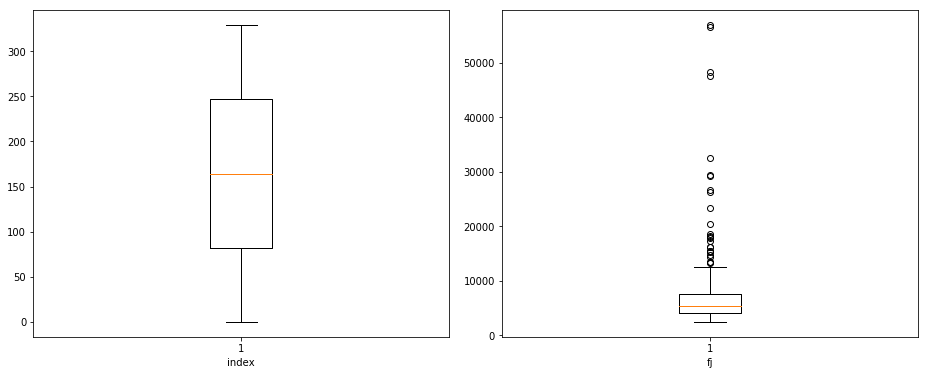

In [49]:
def plot_box(data, cols = 3):
    size  = len(data.columns)
    rows = size//cols + 1
    fig = plt.figure(figsize=(13,10))
    cnt = 1
    for col_name in data.columns:    
        ax = fig.add_subplot(rows,cols,cnt)   
        plt.boxplot(data[col_name])
        ax.set_xlabel(col_name)
        cnt = cnt + 1
        plt.tight_layout()
    plt.show()
plot_box(city_data['fj'].reset_index(), cols = 2)

In [50]:
# 房价倒数10名
city_data.sort_values(['fj']).head(10)

,city,time,fj,province
88,鹤岗,1536508800,2437,黑龙江
2,阿拉尔,1535904000,2452,新疆
216,双鸭山,1536508800,2511,黑龙江
234,石嘴山,1536508800,2529,宁夏
42,大兴安岭,1536508800,2694,黑龙江
131,克孜勒苏,1536508800,2826,新疆
94,和田,1536508800,2834,新疆
248,吐鲁番,1536508800,2847,新疆
294,伊春,1536508800,2923,黑龙江
200,七台河,1536508800,2937,黑龙江


In [51]:
#  房价前10
city_data.sort_values(['fj']).tail(10)

,city,time,fj,province
240,天津,1537113600,23443,天津
224,三亚,1536508800,26326,海南
71,福州,1536508800,26712,福建
181,南京,1537113600,29197,江苏
75,广州,1536508800,29481,广东
110,杭州,1536508800,32450,浙江
278,厦门,1537113600,47641,福建
233,深圳,1537113600,48303,广东
22,北京,1536508800,56615,北京
207,上海,1537113600,56944,上海


### 4.房价全国分布，高房价都集中沿海地带

In [52]:
def get_city_data(city, time=0):
    adata = dataset[(dataset['city'] == city) & (dataset['time'] >= time)].sort_values(['time'])
    values_ = []
    times_= []
    indexs_ = []
    i = 0
    for index,row in adata.iterrows():
        values_.append(row['fj'])
        times_.append(convert_timestamp_to_str(row['time']))
        indexs_.append(i)
        i = i + 1
    return times_, values_, indexs_
def get_province_data(province):
    province_data = []
    for index,row in city_data.iterrows():
        if  row['city'] not in [ '白沙','克孜勒苏','普洱','黔西南'] and row['province'] == province:
            province_data.append((row['city'],row['fj']))
    return province_data

In [53]:
tmp = city_data[(city_data['fj'] > 20000)]

In [54]:
geo = Geo("全国主要城市房价", "data from 房价网", title_color="#fff", title_pos="center",
width=1200, height=600, background_color='#404a59')
attr, value = geo.cast(map_data)
geo.add("", attr, value, visual_range=[2400, 57000], visual_text_color="#fff", symbol_size=8, is_visualmap=True)
geo

In [55]:
geo = Geo("全国主要城市房价", "data from 房价网", title_color="#fff", title_pos="center",
width=1200, height=600, background_color='#404a59')
attr, value = geo.cast(map_data)
attr, value = geo.cast(map_data)
geo.add(
    "",
    attr,
    value,
    type="heatmap",
    is_visualmap=True,
    visual_range=[2400, 57000],
    visual_text_color="#fff",
)
geo

In [56]:
def plot_province_distribution(province = u'福建'):
    province_data_map = get_province_data(province)
    geo = Geo(
        "%s城市房价" % province,
        "data from 房价网",
        title_color="#fff",
        title_pos="center",
        width=1200,
        height=600,
        background_color="#404a59",
    )
    attr, value = geo.cast(province_data_map)
    geo.add(
        "", attr, value, visual_range=[1000, 60000], maptype=province,visual_text_color="#fff", symbol_size=20, is_visualmap=True
    )
    geo

In [57]:
def plot_province_heatmap(province = '福建'):
    province_data_map = get_province_data(province)
    geo = Geo(
        "%s城市房价" % province,
        "data from 房价网",
        title_color="#fff",
        title_pos="center",
        width=1200,
        height=600,
        background_color="#404a59",
    )
    attr, value = geo.cast(province_data_map)
    geo.add(
          "",
        attr,
        value,
        type="heatmap",maptype=province,
        is_visualmap=True,
        visual_range=[1000, 40000],
        visual_text_color="#fff",
    )
    geo

In [58]:
def plot_provice_trend(province = '广东'):
    line = Line("%s" % province)
    for index,row in city_data.iterrows():
        if  row['province'] == province:
            fj_times, fj_values, _ = get_city_data(row['city'])
            line.add(row['city'], fj_times, fj_values, line_opacity=0.2, area_opacity=0.4,is_smooth=True)
    return line
    
def plot_city_trend(city_name = '杭州', time=0):
    fj_times, fj_values, _ = get_city_data(city_name, time)

    line = Line("%s历史房价" % city_name)
    line.add(
        "房价",
        fj_times,
        fj_values,
        mark_point=["max", "min"],
        mark_line=["average"],
        is_smooth=True
    )
    return line    

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(np.array(city_data['fj']).reshape(-1, 1))
labels_ = kmeans.labels_

In [60]:
### print(len(labels_))
for i in range(len(labels_)):
    if labels_[i] == 1:
        print( "%s---%s---%s" % (city_data.iloc[i,0],city_data.iloc[i,2],city_data.iloc[i,3]))

北京---56615---北京
上海---56944---上海
深圳---48303---广东
厦门---47641---福建


### 4. 房价趋势分析

In [61]:
import math
import numpy as np
def mk_test(x):
    s=0
    length=len(x)
    for m in range(0,length-1):
        #print(m)
        #print('/')
        for n in range(m+1,length):
            #print(n)
            #print('*')
            if x[n]>x[m]:
                s=s+1
            elif x[n]==x[m]:
                s=s+0
            else:
                s=s-1
    #计算vars
    vars=length*(length-1)*(2*length+5)/18
    #计算zc
    if s>0:
        zc=(s-1)/math.sqrt(vars)
    elif s==0:
        zc=0
    else:
        zc=(s+1)/math.sqrt(vars)

    #计算za    
    zc1=abs(zc)

    #计算倾斜度
    ndash=int(length*(length-1)/2)
    slope1=np.zeros(ndash)
    m=0
    for k in range(0,length-1):
        for j  in range(k+1,length):
            slope1[m]=(x[j]-x[k])/(j-k)
            m=m+1

    slope=np.median(slope1)
    return (slope,zc1)

In [62]:
def get_trend(time = 0):
    map_city = {}
    for index,row in city_data.iterrows():
        map_city[row["city"]] = row["fj"]
    mk_data_list = []
    for index,row in city.iterrows():
        fj_times, fj_values, _ = get_city_data(row["city"],time)
        if row["city"] != row["province"] :
            mk = mk_test(fj_values)
            if  row["city"] not in map_city.keys():
                continue
            mk_data_list.append([row["city"],row["province"],mk[0],mk[1] , map_city[row["city"]]])
    trend_data = pd.DataFrame(mk_data_list, columns=['city','province','slope','zc','fj'])
    return trend_data

In [63]:
trend_data = get_trend(1520956800)
trend_data_sort = trend_data.sort_values(['slope'])
trend_data_sort[trend_data_sort['slope']<-5].sort_values(['fj'])

D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,city,province,slope,zc,fj
285,阿拉尔,新疆,-5.307692,3.010792,2452
112,双鸭山,黑龙江,-11.896825,4.414089,2511
291,和田,新疆,-6.401961,3.012791,2834
111,七台河,黑龙江,-9.522727,4.390734,2937
264,运城,山西,-5.500000,1.653116,3243
265,阿坝,四川,-6.333333,1.743090,3779
188,白城,吉林,-28.320000,5.841011,3880
191,辽源,吉林,-5.681818,1.719241,3948
204,锦州,辽宁,-6.000000,1.807407,4741
127,新乡,河南,-23.818182,3.967479,5371


In [64]:
plot_city_trend('烟台')

In [65]:
up_data = trend_data_sort[trend_data_sort['slope']>30].sort_values(['slope'])

In [66]:
up_data[up_data['fj'] >9000].sort_values(['slope'])

,city,province,slope,zc,fj
144,武汉,湖北,30.500000,4.586320,18218
199,大连,辽宁,31.600000,2.843360,12534
24,漳州,福建,34.000000,3.658897,12505
168,南通,江苏,34.105263,4.738933,10274
84,东方,海南,34.527273,4.414089,9928
88,文昌,海南,35.063636,5.068028,9329
167,南京,江苏,38.333333,2.418242,29197
318,丽水,浙江,38.545455,2.689069,16224
70,南宁,广西,38.555556,5.510388,9347
322,台州,浙江,42.000000,5.201806,12232


In [67]:
plot_city_trend('青岛')

In [68]:
up_data[up_data['fj'] <9000].sort_values(['slope'])

,city,province,slope,zc,fj
162,张家界,湖南,30.306818,6.422616,5994
83,白沙,海南,30.583333,2.791396,6566
94,邯郸,河北,31.000000,5.289972,8488
134,鄂州,湖北,31.500000,5.841011,5840
248,泰安,山东,32.142857,4.760975,7527
171,泰州,江苏,32.500000,5.113640,8654
118,开封,河南,33.772727,4.849141,5732
176,镇江,江苏,37.100000,6.191532,8693
54,阳江,广东,38.357143,6.524299,4681
234,咸阳,陕西,39.333333,5.951219,5306


In [69]:
plot_city_trend('泉州')

In [70]:
trend_data_sort.tail(30)

,city,province,slope,zc,fj
58,中山,广东,42.812500,4.377851,10901
300,拉萨,西藏,44.733333,5.157723,9895
244,聊城,山东,45.428571,6.105510,7799
283,资阳,四川,45.533333,6.744715,5883
149,宜昌,湖北,45.909091,5.295115,7965
305,大理,云南,46.222222,5.907136,9587
243,莱芜,山东,46.571429,6.612465,6325
253,淄博,山东,46.882353,4.650767,6918
324,舟山,浙江,47.583333,5.730803,14779
214,呼和浩特,内蒙古,48.333333,6.171634,8330


### 5. 价简单预测

SystemExit: 

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2971: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


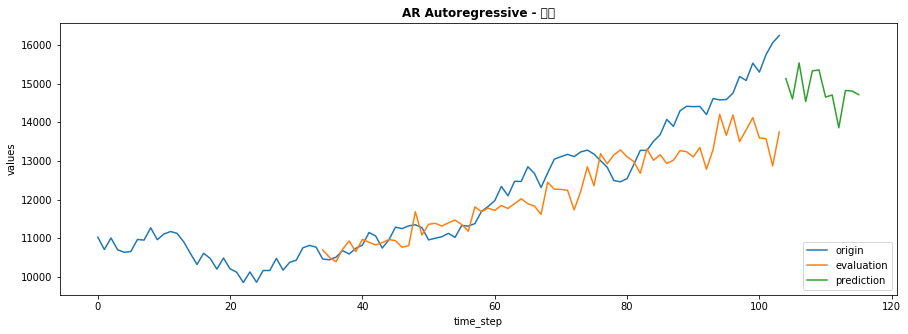

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
def main(_):
    city_name = '金华'
    _,y,x =  get_city_data(city_name)
    y = np.array(y)
    x = np.array(x)
    data = {
        tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
        tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
    }

    reader = NumpyReader(data)
    train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
        reader, batch_size=16, window_size=40)

    ar = tf.contrib.timeseries.ARRegressor(
        periodicities=20, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

    ar.train(input_fn=train_input_fn, steps=10)

    evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
    # keys of evaluation: ['covariance', 'loss', 'mean', 'observed', 'start_tuple', 'times', 'global_step']
    evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1)

    (predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=12)))
    plt.figure(figsize=(15, 5))
    plt.plot(x.reshape(-1), y.reshape(-1), label='origin')
    plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
    plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
    plt.xlabel('time_step')
    plt.ylabel('values')
    plt.title("AR Autoregressive - %s" % city_name ,fontsize='large',fontweight='bold')
    plt.legend(loc=4)
    plt
if __name__ == '__main__':
    tf.app.run()

In [72]:
from os import path

import numpy as np
import tensorflow as tf

from tensorflow.contrib.timeseries.python.timeseries import estimators as ts_estimators
from tensorflow.contrib.timeseries.python.timeseries import model as ts_model
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader

import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt


class _LSTMModel(ts_model.SequentialTimeSeriesModel):
  """A time series model-building example using an RNNCell."""

  def __init__(self, num_units, num_features, dtype=tf.float32):
    """Initialize/configure the model object.
    Note that we do not start graph building here. Rather, this object is a
    configurable factory for TensorFlow graphs which are run by an Estimator.
    Args:
      num_units: The number of units in the model's LSTMCell.
      num_features: The dimensionality of the time series (features per
        timestep).
      dtype: The floating point data type to use.
    """
    super(_LSTMModel, self).__init__(
        # Pre-register the metrics we'll be outputting (just a mean here).
        train_output_names=["mean"],
        predict_output_names=["mean"],
        num_features=num_features,
        dtype=dtype)
    self._num_units = num_units
    # Filled in by initialize_graph()
    self._lstm_cell = None
    self._lstm_cell_run = None
    self._predict_from_lstm_output = None

  def initialize_graph(self, input_statistics):
    """Save templates for components, which can then be used repeatedly.
    This method is called every time a new graph is created. It's safe to start
    adding ops to the current default graph here, but the graph should be
    constructed from scratch.
    Args:
      input_statistics: A math_utils.InputStatistics object.
    """
    super(_LSTMModel, self).initialize_graph(input_statistics=input_statistics)
    self._lstm_cell = tf.nn.rnn_cell.LSTMCell(num_units=self._num_units)
    # Create templates so we don't have to worry about variable reuse.
    self._lstm_cell_run = tf.make_template(
        name_="lstm_cell",
        func_=self._lstm_cell,
        create_scope_now_=True)
    # Transforms LSTM output into mean predictions.
    self._predict_from_lstm_output = tf.make_template(
        name_="predict_from_lstm_output",
        func_=lambda inputs: tf.layers.dense(inputs=inputs, units=self.num_features),
        create_scope_now_=True)

  def get_start_state(self):
    """Return initial state for the time series model."""
    return (
        # Keeps track of the time associated with this state for error checking.
        tf.zeros([], dtype=tf.int64),
        # The previous observation or prediction.
        tf.zeros([self.num_features], dtype=self.dtype),
        # The state of the RNNCell (batch dimension removed since this parent
        # class will broadcast).
        [tf.squeeze(state_element, axis=0)
         for state_element
         in self._lstm_cell.zero_state(batch_size=1, dtype=self.dtype)])

  def _transform(self, data):
    """Normalize data based on input statistics to encourage stable training."""
    mean, variance = self._input_statistics.overall_feature_moments
    return (data - mean) / variance

  def _de_transform(self, data):
    """Transform data back to the input scale."""
    mean, variance = self._input_statistics.overall_feature_moments
    return data * variance + mean

  def _filtering_step(self, current_times, current_values, state, predictions):
    """Update model state based on observations.
    Note that we don't do much here aside from computing a loss. In this case
    it's easier to update the RNN state in _prediction_step, since that covers
    running the RNN both on observations (from this method) and our own
    predictions. This distinction can be important for probabilistic models,
    where repeatedly predicting without filtering should lead to low-confidence
    predictions.
    Args:
      current_times: A [batch size] integer Tensor.
      current_values: A [batch size, self.num_features] floating point Tensor
        with new observations.
      state: The model's state tuple.
      predictions: The output of the previous `_prediction_step`.
    Returns:
      A tuple of new state and a predictions dictionary updated to include a
      loss (note that we could also return other measures of goodness of fit,
      although only "loss" will be optimized).
    """
    state_from_time, prediction, lstm_state = state
    with tf.control_dependencies(
            [tf.assert_equal(current_times, state_from_time)]):
      transformed_values = self._transform(current_values)
      # Use mean squared error across features for the loss.
      predictions["loss"] = tf.reduce_mean(
          (prediction - transformed_values) ** 2, axis=-1)
      # Keep track of the new observation in model state. It won't be run
      # through the LSTM until the next _imputation_step.
      new_state_tuple = (current_times, transformed_values, lstm_state)
    return (new_state_tuple, predictions)

  def _prediction_step(self, current_times, state):
    """Advance the RNN state using a previous observation or prediction."""
    _, previous_observation_or_prediction, lstm_state = state
    lstm_output, new_lstm_state = self._lstm_cell_run(
        inputs=previous_observation_or_prediction, state=lstm_state)
    next_prediction = self._predict_from_lstm_output(lstm_output)
    new_state_tuple = (current_times, next_prediction, new_lstm_state)
    return new_state_tuple, {"mean": self._de_transform(next_prediction)}

  def _imputation_step(self, current_times, state):
    """Advance model state across a gap."""
    # Does not do anything special if we're jumping across a gap. More advanced
    # models, especially probabilistic ones, would want a special case that
    # depends on the gap size.
    return state

  def _exogenous_input_step(
          self, current_times, current_exogenous_regressors, state):
    """Update model state based on exogenous regressors."""
    raise NotImplementedError(
        "Exogenous inputs are not implemented for this example.")

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "D:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "D:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "D:\ProgramData\

[[ 9430.729]
 [ 9522.509]
 [ 9620.987]
 [ 9725.507]
 [ 9835.568]
 [ 9950.797]
 [10070.912]
 [10195.716]
 [10325.077]
 [10458.924]
 [10597.23 ]
 [10740.015]]


<module 'matplotlib.pyplot' from 'D:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

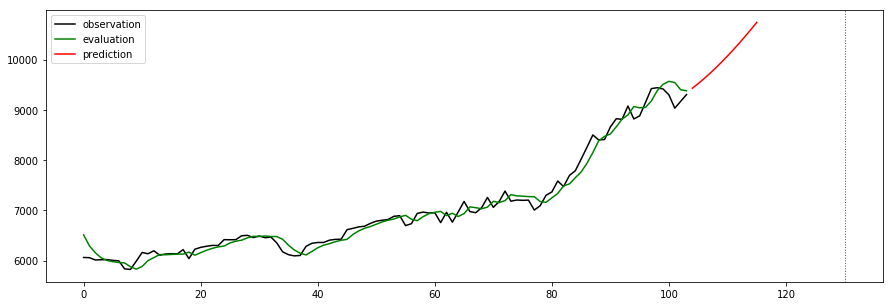

In [73]:
_,y,x =  get_city_data('西安')
y = np.array(y)
x = np.array(x)
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
    reader, batch_size=4, window_size=30)

estimator = ts_estimators.TimeSeriesRegressor(
    model=_LSTMModel(num_features=1, num_units=128),
    optimizer=tf.train.AdamOptimizer(0.001))

estimator.train(input_fn=train_input_fn, steps=2000)
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = estimator.evaluate(input_fn=evaluation_input_fn, steps=1)
# Predict starting after the evaluation
(predictions,) = tuple(estimator.predict(
    input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
        evaluation, steps=12)))

observed_times = evaluation["times"][0]
observed = evaluation["observed"][0, :, :]
evaluated_times = evaluation["times"][0]
evaluated = evaluation["mean"][0]
predicted_times = predictions['times']
predicted = predictions["mean"]
print(predicted)

plt.figure(figsize=(15, 5))
plt.axvline(130, linestyle="dotted", linewidth=1, color='r')
observed_lines = plt.plot(observed_times, observed, label="observation", color="k")
evaluated_lines = plt.plot(evaluated_times, evaluated, label="evaluation", color="g")
predicted_lines = plt.plot(predicted_times, predicted, label="prediction", color="r")
plt.legend(handles=[observed_lines[0], evaluated_lines[0], predicted_lines[0]],
           loc="upper left")
plt